# Hypothesis

- People are more likely to shop online after working hours.
- People are more likely to shop during weekends.
- People are more likely to shop in certain months of the year (i.e. Christmas season), each individual countries’ end of year sales, etc.
- Low unit value items are more likely to be a top 5 sales item in each country.


In [ ]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
import gmaps
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [ ]:
# Filepath of the CSV files
csv_path_1 ='Resources/Year 2009-2010.csv'
csv_path_2 ='Resources/Year 2010-2011.csv'

# Read through CSV files via Pandas
df1=pd.read_csv(csv_path_1, encoding="ISO-8859-1")
df2=pd.read_csv(csv_path_2, encoding="ISO-8859-1")

# Merge the files
dataset = df1.append([df2])

# Display dataframe
dataset.head()

In [ ]:
# Check out the dataframe using describe and info
dataset.describe()

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ï»¿Invoice   1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 73.3+ MB


In [5]:
dataset.keys()

Index(['ï»¿Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [6]:

dataset.count()

ï»¿Invoice     1067371
StockCode      1067371
Description    1062989
Quantity       1067371
InvoiceDate    1067371
Price          1067371
Customer ID     824364
Country        1067371
dtype: int64

Number of customer IDs being less than invoices means that some people did not register and checked out as a guest.

In [7]:
dataset.keys()

Index(['ï»¿Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [8]:
dataset['ï»¿Invoice'] = dataset['ï»¿Invoice'].astype(str)
dataset['StockCode'] = dataset['StockCode'].astype(str)
dataset['Description'] = dataset['Description'].astype(str)
dataset['InvoiceDate'] = dataset['InvoiceDate'].astype(str)
dataset['Country'] = dataset['Country'].astype(str)

In [9]:
dataset=dataset.rename(columns= {"ï»¿Invoice":"Invoice Number",
                         "StockCode": "Stock Code",
                         "InvoiceDate": "Invoice Date",
                         })

In [10]:
grouped_data= dataset.groupby("Country")
grouped_data.count()

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID
Country,,,,,,,
Australia,1913,1913,1913,1913,1913,1913,1913
Austria,938,938,938,938,938,938,938
Bahrain,126,126,126,126,126,126,59
Belgium,3123,3123,3123,3123,3123,3123,3123
Bermuda,34,34,34,34,34,34,0
Brazil,94,94,94,94,94,94,94
Canada,228,228,228,228,228,228,228
Channel Islands,1664,1664,1664,1664,1664,1664,1664
Cyprus,1176,1176,1176,1176,1176,1176,1176


# Shopping trends by month and year for each country - Samra

In [11]:
annual increase/decrease - Zach

SyntaxError: invalid syntax (<ipython-input-11-ad01c8286752>, line 1)

# Customer with highest purchase quantity and $ amount - Zach

# Most popular item by country and overall - Miley

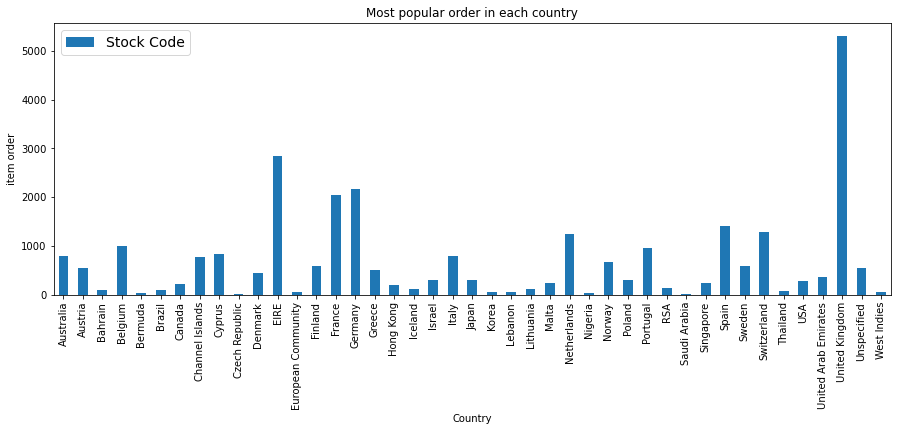

In [22]:
item_ID_df = dataset.groupby("Country").nunique()["Stock Code"]
item_ID = item_ID_df.plot.bar(title= "Most popular order in each country")

item_ID.set_xlabel("Country")
item_ID.set_ylabel("item order")
plt.legend(fontsize = 14)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [23]:
stock_id = dataset.groupby("Stock Code")
count_stock = stock_id["Stock Code"].count()
count_stock

Stock Code
10002           400
10002R            3
10080            31
10109             2
10120            79
               ... 
gift_0001_60      2
gift_0001_70      3
gift_0001_80      4
gift_0001_90      2
m                 5
Name: Stock Code, Length: 5305, dtype: int64

In [ ]:
item_ID_df = dataset.groupby(["Country"])
sum_item = item_ID_df.sum()
sum_item.head()

In [25]:
dataset["Lat"] = ""
dataset["Lng"] = ""
dataset.head()

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country,Lat,Lng
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom,,
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,,
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,,
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom,,
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom,,


Heatmap of sales vs. country - Miley

In [ ]:
params = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in dataset.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    Country = row['Country']

    # update address key value
    params['address'] = f"{Country}"

    # make request
    cities_lat_lng = requests.get(base_url, params=params)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()

    dataset.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    dataset.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appea
dataset.head()

In [ ]:
dataset.dropna(inplace = True) 
dataset.head()
locations = dataset[["Lat", "Lng"]]

# Fill NaN values and convert to float
high_valome_sale = dataset["Country"].astype(float)


In [ ]:
fig = gmaps.figure(map_type="HYBRID")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig

Time of the day with highest sale volume - Samra

Whether people are more likely to shop online during a certain time of the day or weekdays/weekends.

Whether people are more likely to shop in certain months of the year (i.e. Christmas season), each individual countries’ end of year sales, etc.

Whether low unit value items are more likely to be a top 5 sales item in each country.